# K-Means
### KABONGO BUZANGU Ben

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
from scipy.spatial.distance import cdist

Créons quatre clusters.

In [2]:
cl1 = np.random.rand(10, 2) + [-1, 0]
cl2 = np.random.rand(10, 2) + [1, 0]
cl3 = np.random.rand(10, 2) + [0, -1]
cl4 = np.random.rand(10, 2) + [0, 1]

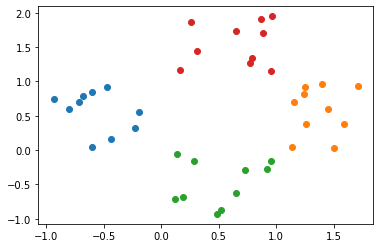

In [3]:
plt.scatter(cl1[:,0], cl1[:,1])
plt.scatter(cl2[:,0], cl2[:,1])
plt.scatter(cl3[:,0], cl3[:,1])
plt.scatter(cl4[:,0], cl4[:,1])
plt.show()

In [4]:
X = np.concatenate((cl1, cl2, cl3, cl4))
X.shape

(40, 2)

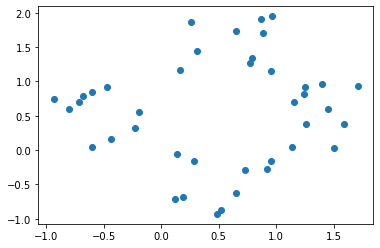

In [5]:
plt.scatter(X[:,0], X[:,1])

Sélectionnons aléatoirement 4 centres.

In [6]:
centers = np.array(random.sample(list(X), 4))
centers

array([[ 0.16533753,  1.17116509],
       [ 1.13948242,  0.04898481],
       [ 0.88203563,  1.70545869],
       [-0.2267646 ,  0.32735102]])

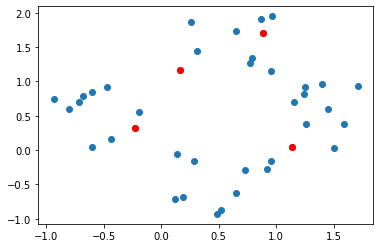

In [7]:
plt.scatter(X[:,0], X[:,1])
plt.scatter(centers[:,0], centers[:,1], c='r')

Appliquons l'algorithme des K-means.

In [8]:
C = centers.copy()
Y = -1 * np.ones_like(X)
n_iter = 100
for _ in range(n_iter):
    dist = cdist(X, C)
    Y = np.argmin(dist, axis=1)
    C[0] = np.mean(X[np.where(Y==0)[0]], axis=0)
    C[1] = np.mean(X[np.where(Y==1)[0]], axis=0)
    C[2] = np.mean(X[np.where(Y==2)[0]], axis=0)
    C[3] = np.mean(X[np.where(Y==3)[0]], axis=0)

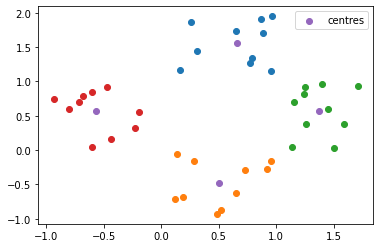

In [9]:
plt.scatter(X[Y==0][:,0], X[Y==0][:,1])
plt.scatter(X[Y==1][:,0], X[Y==1][:,1])
plt.scatter(X[Y==2][:,0], X[Y==2][:,1])
plt.scatter(X[Y==3][:,0], X[Y==3][:,1])
plt.scatter(C[:,0], C[:,1], label='centres')
plt.legend()

Ecrivons la fonction `k-means`, qui prend en paramètre un dataset `X`, le nombre de clsuters `k` et un nombre d'itération `n_iter`. Elle retourne les `centres` des clusters et l'indice du cluster de chaque exemple du dataset.

In [10]:
def k_means(X, k, n_iter):
    C = np.array(random.sample(list(X), k))
    Y = -1 * np.ones_like(X)
    for _ in range(n_iter):
        dist = cdist(X, C)
        Y = np.argmin(dist, axis=1)
        for i in range(k):
            C[i] = np.mean(X[np.where(Y==i)[0]], axis=0)
    return C, Y

**Expérimentations**

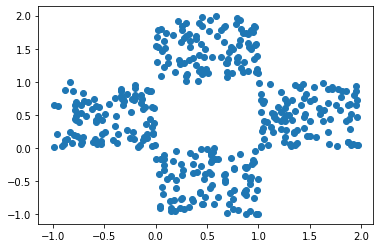

In [11]:
cl1 = np.random.rand(100, 2) + [-1, 0]
cl2 = np.random.rand(100, 2) + [1, 0]
cl3 = np.random.rand(100, 2) + [0, -1]
cl4 = np.random.rand(100, 2) + [0, 1]
X = np.concatenate((cl1, cl2, cl3, cl4))
plt.scatter(X[:,0], X[:,1])

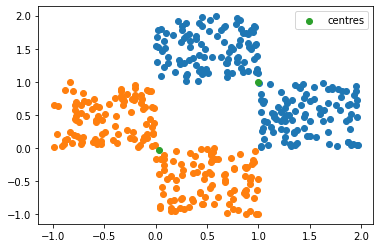

In [12]:
C, Y = k_means(X, 2, 100)
for y in range(2):
    plt.scatter(X[Y==y][:,0], X[Y==y][:,1])
plt.scatter(C[:,0], C[:,1], label='centres')
plt.legend()

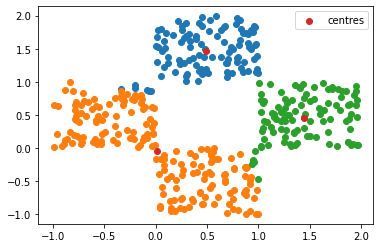

In [13]:
C, Y = k_means(X, 3, 100)
for y in range(3):
    plt.scatter(X[Y==y][:,0], X[Y==y][:,1])
plt.scatter(C[:,0], C[:,1], label='centres')
plt.legend()

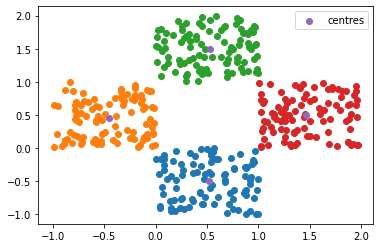

In [14]:
C, Y = k_means(X, 4, 100)
for y in range(4):
    plt.scatter(X[Y==y][:,0], X[Y==y][:,1])
plt.scatter(C[:,0], C[:,1], label='centres')
plt.legend()

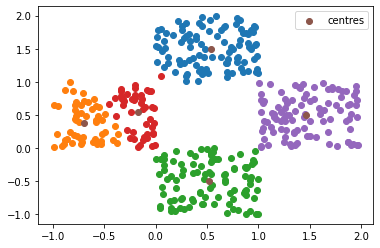

In [15]:
C, Y = k_means(X, 5, 100)
for y in range(5):
    plt.scatter(X[Y==y][:,0], X[Y==y][:,1])
plt.scatter(C[:,0], C[:,1], label='centres')
plt.legend()